<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [7]:
from bs4 import BeautifulSoup
import requests

listings = pd.read_csv('job_listings.csv')
listings.head()
##### Your Code Here #####
# text = soup.get_text()
                


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [11]:
content = listings['description'][0]
soup = BeautifulSoup(content)
print(soup.get_text())

b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"


In [13]:
counter = 0 
for description in listings['description']:
    content = listings['description'][counter]
    soup = BeautifulSoup(content)
    listings.iloc[counter, 1] = soup.get_text()
    counter = counter + 1

listings.head()

,Unnamed: 0,description,title
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [14]:
##### Your Code Here #####
nlp = spacy.load("en_core_web_lg")

In [50]:
listings2 = listings.copy()
text = listings2.iloc[0,1]
doc = nlp(text.strip())
text = [token.lemma_ for token in doc if (token.is_stop !=True) and (token.is_punct != True)]
print(type(text))
print(text)
# cast the data frame as an object type
listings2 = listings2.astype('object')
listings2.loc[0,'description'] = text
test = listings2['description'][0]
test[0]


<class 'list'>
['b"Job', 'requirements:\\nconceptual', 'understanding', 'Machine', 'Learning', 'model', 'like', 'nai\\xc2\\xa8ve', 'Bayes', 'K', 'Means', 'SVM', 'Apriori', 'Linear/', 'Logistic', 'Regression', 'neural', 'Random', 'Forests', 'decision', 'Trees', 'K', 'NN', 'hand', 'experience', '2', 'them\\nintermediate', 'expert', 'level', 'coding', 'skill', 'Python', 'R.', 'ability', 'write', 'function', 'clean', 'efficient', 'datum', 'manipulation', 'mandatory', 'role)\\nexposure', 'package', 'like', 'NumPy', 'SciPy', 'Pandas', 'Matplotlib', 'etc', 'Python', 'GGPlot2', 'dplyr', 'tidyR', 'R\\nAbility', 'communicate', 'Model', 'finding', 'Technical', 'Non', 'technical', 'stake', 'holders\\nhand', 'experience', 'SQL', 'Hive', 'similar', 'programming', 'language\\nmust', 'past', 'work', 'GitHub', 'Kaggle', 'publish', 'article\\nmaster', 'degree', 'Statistics', 'Mathematics', 'Computer', 'Science', 'quant', 'specific', 'field.\\napply']


'b"Job'

In [52]:
# use listings2 as an object type data frame
listings2 = listings.copy()
listings2 = listings2.astype(object)

counter = 0 
for description in listings2['description']:
    text = listings2['description'][counter]
    doc = nlp(text.strip())
    text2 = [token.lemma_ for token in doc if (token.is_stop !=True) and (token.is_punct != True)]
    listings2.iloc[counter, 1]=text2
    counter = counter + 1

listings2.head()

,Unnamed: 0,description,title,1
0,0,"[b""Job, requirements:\nconceptual, understandi...",Data scientist,NaN
1,1,"[b'Job, description\n\na, Data, scientist, 1, ...",Data Scientist I,NaN
2,2,"[b'As, Data, scientist, work, consult, busines...",Data Scientist - Entry Level,NaN
3,3,"[b'$4,969, $, 6,756, monthcontractunder, gener...",Data Scientist,NaN
4,4,"[b'Location, USA, \xe2\x80\x93, multiple, loca...",Data Scientist,NaN


In [112]:
listings.head()

,Unnamed: 0,description,title,1
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist,NaN
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I,NaN
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level,NaN
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist,NaN
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist,NaN


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [60]:
# make a list of all the tokens in listings2['description']
tokens = []
counter = 0
for description in listings2['description']:
    for token in listings2['description'][counter]:
        tokens.append(token)
    counter = counter + 1

print(tokens)
    

['b"Job', 'requirements:\\nconceptual', 'understanding', 'Machine', 'Learning', 'model', 'like', 'nai\\xc2\\xa8ve', 'Bayes', 'K', 'Means', 'SVM', 'Apriori', 'Linear/', 'Logistic', 'Regression', 'neural', 'Random', 'Forests', 'decision', 'Trees', 'K', 'NN', 'hand', 'experience', '2', 'them\\nintermediate', 'expert', 'level', 'coding', 'skill', 'Python', 'R.', 'ability', 'write', 'function', 'clean', 'efficient', 'datum', 'manipulation', 'mandatory', 'role)\\nexposure', 'package', 'like', 'NumPy', 'SciPy', 'Pandas', 'Matplotlib', 'etc', 'Python', 'GGPlot2', 'dplyr', 'tidyR', 'R\\nAbility', 'communicate', 'Model', 'finding', 'Technical', 'Non', 'technical', 'stake', 'holders\\nhand', 'experience', 'SQL', 'Hive', 'similar', 'programming', 'language\\nmust', 'past', 'work', 'GitHub', 'Kaggle', 'publish', 'article\\nmaster', 'degree', 'Statistics', 'Mathematics', 'Computer', 'Science', 'quant', 'specific', 'field.\\napply', "b'Job", 'description\\n\\na', 'Data', 'scientist', '1', 'help', 'bu

In [114]:




descriptions = []
counter = 0
for description in listings['description']:
    description = listings['description'][counter]
    descriptions.append(description)
    counter = counter + 1

print(descriptions[2])

b'As a Data Scientist you will be working on consulting side of our business. You will be responsible for analyzing large, complex datasets and identify meaningful patterns that lead to actionable recommendations. You will be performing thorough testing and validation of models, and support various aspects of the business with data analytics.\nAbility to do statistical modeling, build predictive models and leverage machine learning algorithms.\nThis position will combine the typical Data Scientist math and analytical skills, with research, advanced business, communication, and presentation skills.\nPrimary job location is in Sacramento, but work-from-home option is available.\n\nQualifications\nBachelors, MS or PhD in a relevant field (Computer Science, Engineering, Statistics, Physics, Applied Math)\nExperience in R and/or Python is preferred'


In [95]:
##### Your Code Here #####
vect = CountVectorizer(stop_words=nlp.Defaults.stop_words, max_features=1000)

vect.fit(descriptions)

dtm = vect.transform(descriptions)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

dtm.head()

dtm.shape

/home/ndow33/miniconda3/envs/my-unit-4-env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


(426, 1000)

In [96]:
dtm.head()

,000,10,100,2019,40,abilities,ability,able,academic,access,...,xa6,xae,xb7,xbb,xc2,xe2,xef,year,years,york
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,2,0,0,0,0,8,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## 4) Visualize the most common word counts

In [97]:
from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [101]:
word_counts = count(listings2['description'])

In [102]:
word_counts.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
56,datum,405,2611,1.0,0.020466,0.020466,0.950704
40,work,368,1370,2.0,0.010738,0.031204,0.863850
96,team,358,1178,3.0,0.009233,0.040438,0.840376
36,experience,373,1122,4.0,0.008795,0.049232,0.875587
268,business,313,1103,5.0,0.008646,0.057878,0.734742


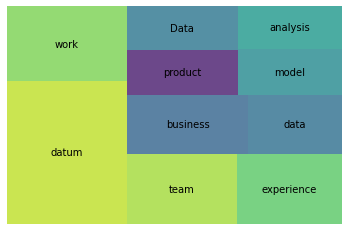

In [103]:
import squarify
top10 = word_counts[word_counts['rank'] <= 10]

squarify.plot(sizes=top10['pct_total'], label=top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [104]:
# instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words=nlp.Defaults.stop_words,
                       ngram_range=(1,2),
                       max_df=.97,
                       min_df=3,
                       max_features=5000)

# create a vocabulary and get word counts
dtm = tfidf.fit_transform(descriptions)

# get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# view feature matrix as dataframe
dtm.head()


/home/ndow33/miniconda3/envs/my-unit-4-env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,000,000 employees,10,10 years,100,100 000,11,12,12 months,15,...,years professional,years related,years relevant,years work,years working,years xe2,yes,york,york city,yrs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [106]:
from sklearn.neighbors import NearestNeighbors

# fit on dtm
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [107]:
my_description = ['''Amazon Advertising operates at the intersection of eCommerce and advertising, offering a rich array of digital display advertising solutions with the goal of helping our customers find and discover anything they want to buy. We help advertisers reach Amazon customers on Amazon.com, across our other owned and operated sites, on other high quality sites across the web, and on millions of Kindles, tablets, mobile devices, and connected TVs. We start with the customer and work backwards in everything we do, including advertising.

The Advanced Analytics and Decision Support (AADS) team under Global Sales Operations shapes strategies for advertising sales teams, develops cutting edge data pipelines, builds accurate predictive models, and deploys automated solutions to provide forecasting insights to business leaders at the most senior levels of the company.

This role will work closely with data analysts and engineers to develop and run statistical models to understand business trends in advertising, produce sales input & output forecasts, and drive sales productivity and operational effectiveness. This role requires superior analytic thinkers who are able to quickly approach large ambiguous problems and apply their technical and statistical knowledge to identify opportunities for further research. The ideal candidate will demonstrate a deep understanding of identifying meaningful key performance indicators and building actionable metrics. The ideal candidate will also be able to independently mine and analyze data, and be able to use any necessary programming and statistical analysis software to do so in fast-paced environments.

Key Responsibilities:
Implement statistical methods to solve specific business problems utilizing code (Python, R, Scala, etc.).
Improve upon existing methodologies by developing new data sources, testing model enhancements, and fine-tuning model parameters.
Directly contribute to the design and development of automated forecasting systems.
Build customer-facing reporting tools to provide insights and metrics which track forecast performance and explain variance.
Collaborate with data engineers, researchers, and business leaders to define product requirements, provide analytical support, and communicate feedback.
Present critical data in a format that is immediately useful to answer questions about the inputs and outputs of forecasting systems.

Master's degree in Statistics, Mathematics, Business Analytics, or related quantitative discipline
Expert knowledge of SQL
Experience with big data: extraction, processing, filtering, and presenting large data quantities (100K to millions of rows) via AWS technologies, SQL, and data pipelines
Experience in online advertising''']

In [108]:
# query using nneighbors
# turn the description into a tf idf vector
new = tfidf.transform(my_description)

In [109]:
# turn the tf idf vector into a dense matrix
# while plugging it into our knearest neighbors model
nn.kneighbors(new.todense())

(array([[1.09661826, 1.18943163, 1.2630704 , 1.27296655, 1.27296655]]),
 array([[  8, 419, 129, 122,  55]]))

In [115]:
descriptions[419]

"b'Bachelor\\xe2\\x80\\x99s or Master\\xe2\\x80\\x99s degree in a quantitative field such as Statistics, Applied Mathematics, Physics, Engineering, Computer Science, or Economics\\n2+ years of relevant working experience in an analytical role involving data extraction, analysis, and communication\\n2+ years of experience with data querying languages (e.g. SQL, Hadoop/Hive) and statistical/mathematical software (e.g. R, Weka, Matlab, Stata)\\n\\nThe Amazon Demand Forecasting team seeks a Data Scientist with strong analytical and communication skills to join our team. We develop sophisticated algorithms that involve learning from large amounts of data, such as prices, promotions, similar products, and a product\\xe2\\x80\\x99s attributes, in order to forecast the demand of millions of products world-wide. These forecasts are used to automatically order millions of dollars\\xe2\\x80\\x99 worth of inventory weekly and establish plans for tens of thousands of employees. The work is complex 

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 